# Convolutional Neural Networks with TensorFlow on Fashion MNIST Dataset

In [0]:
import numpy as np
import keras
import tensorflow as tf
import matplotlib.pyplot as plt

(X_train, y_train), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()

Using TensorFlow backend.


In [0]:
print("X_train.shape: ", X_train.shape)
print("X_test.shape: ", X_test.shape)
print("y_train.shape: ", y_train.shape)
print("y_test.shape: ", y_test.shape)

X_train.shape:  (60000, 28, 28)
X_test.shape:  (10000, 28, 28)
y_train.shape:  (60000,)
y_test.shape:  (10000,)


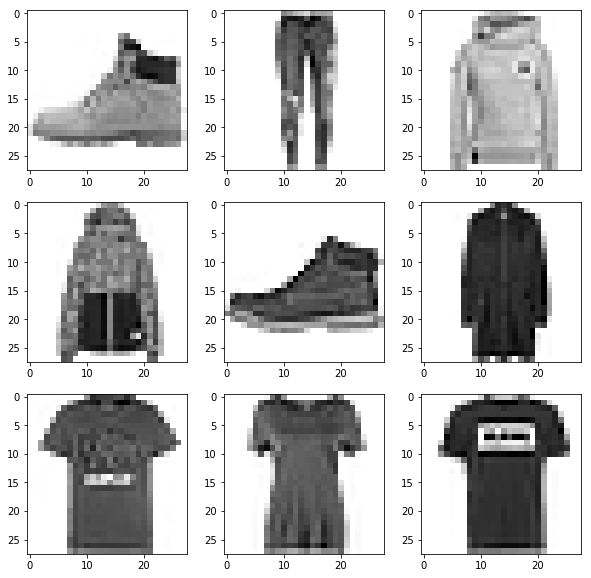

In [0]:
fig, axes = plt.subplots(3, 3, figsize=(10, 10))

axes = axes.ravel()

for ax, num in zip(axes, [90, 78, 54, 22, 89, 1021, 6787, 10, 1]):
    ax.imshow(X_train[num], cmap=plt.cm.binary)
    plt.grid(False)

plt.show()

In [0]:
# ============ preprocess the data =============
# reshape the Xs
X_train = X_train.reshape(-1, X_train.shape[1]*X_train.shape[2])
X_test = X_test.reshape(-1, X_test.shape[1]*X_test.shape[1])
# normalize
X_train = X_train / 255.0
X_test = X_test / 255.0
# labels to categorical
Y_train = keras.utils.to_categorical(y_train, 10)
Y_test = keras.utils.to_categorical(y_test, 10)

In [0]:
print("X_train.shape: ", X_train.shape)
print("X_test.shape: ", X_test.shape)
print("y_train.shape: ", y_train.shape)
print("y_test.shape: ", y_test.shape)

X_train.shape:  (60000, 784)
X_test.shape:  (10000, 784)
y_train.shape:  (60000,)
y_test.shape:  (10000,)


In [0]:
# =========== defining the functions ===============
def weigth_variable(shape):
    initial = tf.truncated_normal(shape=shape, stddev=0.3)
    return tf.Variable(initial)

def bias_variable(shape):
    initial = tf.constant(value=0.1, shape=shape)
    return tf.Variable(initial)

def conv2d(x, W):
    return tf.nn.conv2d(x, W, strides=[1, 1, 1, 1], padding='SAME')

def max_pooling_2x2(x):
    return tf.nn.max_pool(x, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')

def conv_layer(input, shape):
    W = weigth_variable(shape)
    b = bias_variable([shape[3]])
    return tf.nn.relu(conv2d(input, W) + b)

def full_layer(input, size):
    input_size = int(input.get_shape()[1])
    W = weigth_variable([input_size, size])
    b = bias_variable([size])
    return tf.matmul(input, W) + b

In [0]:
# ======== the arcitechture ==============
x = tf.placeholder(tf.float32, shape=[None, 784])
y_true = tf.placeholder(tf.float32, shape=[None, 10])

x_image = tf.reshape(x, shape=[-1, 28, 28, 1])
conv1 = conv_layer(x_image, shape=[5, 5, 1, 32])
conv1_pool = max_pooling_2x2(conv1)

conv2 = conv_layer(conv1_pool, shape=[5, 5, 32, 64])
conv2_pool = max_pooling_2x2(conv2)

conv2_flat = tf.reshape(conv2_pool, shape=[-1, conv2_pool.shape[1]*conv2_pool.shape[2]*conv2_pool.shape[3]])
full_1 = tf.nn.relu(full_layer(conv2_flat, 1024))

rate = tf.placeholder(tf.float32)
full_1_drop = tf.nn.dropout(full_1, rate=rate)

y_pred = full_layer(full_1_drop, 10)

In [0]:
LEARNING_RATE = 0.01
EPOCHS = 3

cross_entropy = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(labels=y_true, logits=y_pred))

train_step = tf.train.AdamOptimizer(LEARNING_RATE).minimize(cross_entropy)

correct_prediction = tf.equal(tf.argmax(y_pred, 1), tf.argmax(y_true, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())

    for epoch in range(EPOCHS):
        percentage = 0
        batch_index = np.split(np.random.permutation(X_train.shape[0]), 600)
        print("Epoch {}:".format(epoch+1))

        for batch in range(600):
            batch_X = X_train[batch_index[batch]]
            batch_Y = Y_train[batch_index[batch]]
            if batch%60 == 0:
                train_accuracy = sess.run(accuracy, feed_dict={x: batch_X,
                                                               y_true: batch_Y,
                                                               rate: 0})
                print("{}%, training accuracy = {}".format(percentage, train_accuracy))
                percentage += 10

            sess.run(train_step, feed_dict={x: batch_X,
                                            y_true: batch_Y,
                                            rate: 0.1})
        train_accuracy = sess.run(accuracy, feed_dict={x: batch_X, 
                                                           y_true: batch_Y,
                                                           rate: 0})
        print("{}%, training accuracy = {}".format(percentage, train_accuracy))
        print()

Epoch 0:
0%, training accuracy = 0.12999999523162842
10%, training accuracy = 0.6600000262260437
20%, training accuracy = 0.6499999761581421
30%, training accuracy = 0.6899999976158142
40%, training accuracy = 0.7699999809265137
50%, training accuracy = 0.8299999833106995
60%, training accuracy = 0.75
70%, training accuracy = 0.8100000023841858
80%, training accuracy = 0.7599999904632568
90%, training accuracy = 0.7900000214576721
100%, training accuracy = 0.8299999833106995

Epoch 1:
0%, training accuracy = 0.8399999737739563
10%, training accuracy = 0.8100000023841858
20%, training accuracy = 0.8700000047683716
30%, training accuracy = 0.8500000238418579
40%, training accuracy = 0.7699999809265137
50%, training accuracy = 0.8399999737739563
60%, training accuracy = 0.8299999833106995
70%, training accuracy = 0.8299999833106995
80%, training accuracy = 0.8399999737739563
90%, training accuracy = 0.8100000023841858
100%, training accuracy = 0.8999999761581421

Epoch 2:
0%, training acc